In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import os
drive.mount('/content/drive')

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
#from keras.optimizers import Adam,SGD,RMSprop
from keras import callbacks
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/facial_expression/fer2013

/content/drive/MyDrive/facial_expression/fer2013


In [3]:
df = pd.read_csv('fer2013.csv')
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 
img_array = np.stack(df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')), axis=0)
labels = df.emotion.values

X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.1, random_state=2)

X_train = X_train/255
X_test = X_test/255

In [4]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
#from tf.keras.layers.normalization import BatchNormalization

In [5]:
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [6]:
model2 = Sequential()

#1st CNN layer
model2.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.25))

#2nd CNN layer
model2.add(Conv2D(128,(5,5),padding = 'same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout (0.25))

#3rd CNN layer
model2.add(Conv2D(512,(3,3),padding = 'same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout (0.25))

#4th CNN layer
model2.add(Conv2D(512,(3,3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

#Fully connected 1st layer
model2.add(Dense(256))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.25))


# Fully connected layer 2nd layer
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.25))

model2.add(Dense(7, activation='softmax'))

In [17]:
model3 = Sequential()

#1st CNN layer
model3.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout(0.25))

#2nd CNN layer
model3.add(Conv2D(128,(5,5),padding = 'same'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout (0.25))

#3rd CNN layer
model3.add(Conv2D(512,(3,3),padding = 'same'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout (0.25))

#4th CNN layer
model3.add(Conv2D(512,(3,3), padding='same'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())

#Fully connected 1st layer
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.25))


# Fully connected layer 2nd layer
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.25))

model3.add(Dense(7, activation='softmax'))

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [8]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [18]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

try:
  os.mkdir("checkpoint")
except:
  pass

file_name = 'model.h5'
file_name2 = 'model2.h5'
file_name3 = 'model3.h5'

checkpoint_path= os.path.join('checkpoint',file_name)
checkpoint_path2= os.path.join('checkpoint',file_name2)
checkpoint_path3= os.path.join('checkpoint',file_name3)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

call_back2 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path2, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

call_back3 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path3, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

reduce_learningrate3 = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

In [10]:
callbacks_list = [early_stopping,call_back,reduce_learningrate]

In [11]:
callbacks_list2 = [call_back2]

In [20]:
callbacks_list3 = [call_back3, reduce_learningrate3]

In [12]:
hist2 = model2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test) ,callbacks=callbacks_list2)

Epoch 1/100
1010/1010 [==============================] - 67s 36ms/step - loss: 1.9274 - accuracy: 0.2572 - val_loss: 1.7310 - val_accuracy: 0.3076

Epoch 00001: val_accuracy improved from -inf to 0.30761, saving model to checkpoint/model2.h5
Epoch 2/100
1010/1010 [==============================] - 36s 36ms/step - loss: 1.7275 - accuracy: 0.3396 - val_loss: 1.7680 - val_accuracy: 0.3522

Epoch 00002: val_accuracy improved from 0.30761 to 0.35219, saving model to checkpoint/model2.h5
Epoch 3/100
1010/1010 [==============================] - 36s 35ms/step - loss: 1.5867 - accuracy: 0.3906 - val_loss: 1.5577 - val_accuracy: 0.4046

Epoch 00003: val_accuracy improved from 0.35219 to 0.40457, saving model to checkpoint/model2.h5
Epoch 4/100
1010/1010 [==============================] - 36s 35ms/step - loss: 1.4824 - accuracy: 0.4311 - val_loss: 1.4086 - val_accuracy: 0.4492

Epoch 00004: val_accuracy improved from 0.40457 to 0.44915, saving model to checkpoint/model2.h5
Epoch 5/100
1010/1010 [

In [13]:
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test) ,callbacks=callbacks_list)

Epoch 1/100
1010/1010 [==============================] - 38s 36ms/step - loss: 1.9269 - accuracy: 0.2578 - val_loss: 1.7407 - val_accuracy: 0.3107

Epoch 00001: val_accuracy improved from -inf to 0.31067, saving model to checkpoint/model.h5
Epoch 2/100
1010/1010 [==============================] - 36s 36ms/step - loss: 1.7050 - accuracy: 0.3414 - val_loss: 1.5655 - val_accuracy: 0.3820

Epoch 00002: val_accuracy improved from 0.31067 to 0.38200, saving model to checkpoint/model.h5
Epoch 3/100
1010/1010 [==============================] - 36s 36ms/step - loss: 1.5767 - accuracy: 0.3936 - val_loss: 1.5013 - val_accuracy: 0.4071

Epoch 00003: val_accuracy improved from 0.38200 to 0.40708, saving model to checkpoint/model.h5
Epoch 4/100
1010/1010 [==============================] - 37s 36ms/step - loss: 1.4672 - accuracy: 0.4362 - val_loss: 1.5070 - val_accuracy: 0.4188

Epoch 00004: val_accuracy improved from 0.40708 to 0.41878, saving model to checkpoint/model.h5
Epoch 5/100
1010/1010 [====

In [21]:
hist3 = model3.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test) ,callbacks=callbacks_list3)

Epoch 1/100
1010/1010 [==============================] - 38s 36ms/step - loss: 1.9249 - accuracy: 0.2605 - val_loss: 1.6991 - val_accuracy: 0.3229

Epoch 00001: val_accuracy improved from -inf to 0.32293, saving model to checkpoint/model3.h5
Epoch 2/100
1010/1010 [==============================] - 37s 36ms/step - loss: 1.6980 - accuracy: 0.3498 - val_loss: 1.6269 - val_accuracy: 0.3837

Epoch 00002: val_accuracy improved from 0.32293 to 0.38367, saving model to checkpoint/model3.h5
Epoch 3/100
1010/1010 [==============================] - 36s 36ms/step - loss: 1.5727 - accuracy: 0.3972 - val_loss: 1.4856 - val_accuracy: 0.4157

Epoch 00003: val_accuracy improved from 0.38367 to 0.41571, saving model to checkpoint/model3.h5
Epoch 4/100
1010/1010 [==============================] - 36s 36ms/step - loss: 1.4707 - accuracy: 0.4344 - val_loss: 1.3822 - val_accuracy: 0.4547

Epoch 00004: val_accuracy improved from 0.41571 to 0.45472, saving model to checkpoint/model3.h5
Epoch 5/100
1010/1010 [

<Figure size 432x288 with 0 Axes>

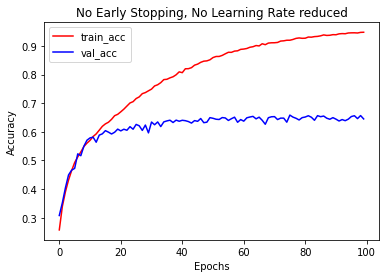

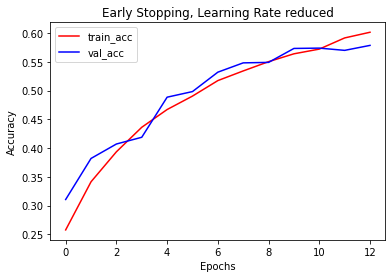

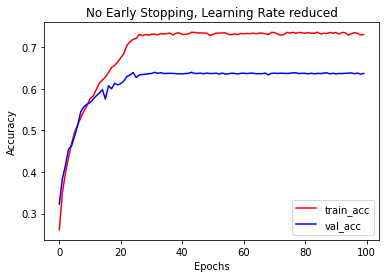

<Figure size 432x288 with 0 Axes>

In [23]:
from matplotlib import pyplot
%matplotlib inline

train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

train_acc2=hist2.history['accuracy']
val_acc2=hist2.history['val_accuracy']

train_acc3=hist3.history['accuracy']
val_acc3=hist3.history['val_accuracy']

epochs = range(len(train_acc))
epochs2 = range(len(train_acc2))
epochs3 = range(len(train_acc3))

pyplot.plot(epochs2,train_acc2,'r', label='train_acc')
pyplot.plot(epochs2,val_acc2,'b', label='val_acc')
pyplot.title('No Early Stopping, No Learning Rate reduced')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()

pyplot.plot(epochs,train_acc,'r', label='train_acc')
pyplot.plot(epochs,val_acc,'b', label='val_acc')
pyplot.title('Early Stopping, Learning Rate reduced')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()

pyplot.plot(epochs3,train_acc3,'r', label='train_acc')
pyplot.plot(epochs3,val_acc3,'b', label='val_acc')
pyplot.title('No Early Stopping, Learning Rate reduced')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.legend()
pyplot.figure()

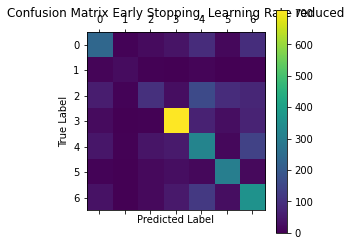

In [24]:
from sklearn.metrics import confusion_matrix
results = model.predict(X_test)
results=np.argmax(results,axis=1)
cm = confusion_matrix(y_test, results)
plt.matshow(cm)
plt.title('Confusion Matrix Early Stopping, Learning Rate reduced')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

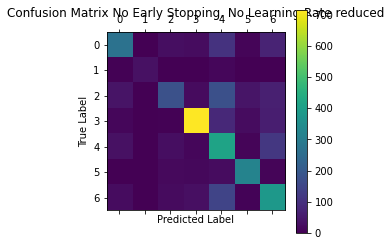

In [25]:
from sklearn.metrics import confusion_matrix
results2 = model2.predict(X_test)
results2=np.argmax(results2,axis=1)
cm2 = confusion_matrix(y_test, results2)
plt.matshow(cm2)
plt.title('Confusion Matrix No Early Stopping, No Learning Rate reduced')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

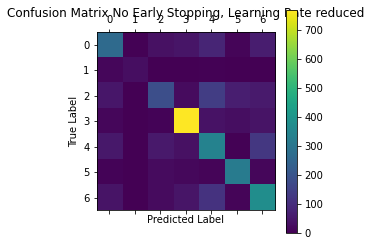

In [26]:
from sklearn.metrics import confusion_matrix
results3 = model3.predict(X_test)
results3=np.argmax(results3,axis=1)
cm3 = confusion_matrix(y_test, results3)
plt.matshow(cm3)
plt.title('Confusion Matrix No Early Stopping, Learning Rate reduced')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()